In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, widgets
from IPython.display import display

In [ ]:
# Tentukan path file dataset di Google Drive
path = '/content/drive/My Drive/Dataset/diamonds.csv'

# Baca dataset menggunakan pandas
df = pd.read_csv(path)

df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
for column in df.columns:
    unique_values = df[column].nunique()
    print(f"Jumlah unique value untuk kolom {column}: {unique_values}")

Jumlah unique value untuk kolom Unnamed: 0: 53940
Jumlah unique value untuk kolom carat: 273
Jumlah unique value untuk kolom cut: 5
Jumlah unique value untuk kolom color: 7
Jumlah unique value untuk kolom clarity: 8
Jumlah unique value untuk kolom depth: 184
Jumlah unique value untuk kolom table: 127
Jumlah unique value untuk kolom price: 11602
Jumlah unique value untuk kolom x: 554
Jumlah unique value untuk kolom y: 552
Jumlah unique value untuk kolom z: 375


In [ ]:
# Numerical features
numerical_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Categorical features
categorical_features = ['cut', 'color', 'clarity']

# Target
target = ['price']

# Mengelompokkan kolom-kolom ke dalam kategori yang sesuai
numerical_df = df[numerical_features]
categorical_df = df[categorical_features]
target_df = df[target]

# Print hasil kelompokkan
print("Numerical Features:")
print(numerical_df.head())

print("\nCategorical Features:")
print(categorical_df.head())

print("\nTarget:")
print(target_df.head())

Numerical Features:
   carat  depth  table     x     y     z
0   0.23   61.5   55.0  3.95  3.98  2.43
1   0.21   59.8   61.0  3.89  3.84  2.31
2   0.23   56.9   65.0  4.05  4.07  2.31
3   0.29   62.4   58.0  4.20  4.23  2.63
4   0.31   63.3   58.0  4.34  4.35  2.75

Categorical Features:
       cut color clarity
0    Ideal     E     SI2
1  Premium     E     SI1
2     Good     E     VS1
3  Premium     I     VS2
4     Good     J     SI2

Target:
   price
0    326
1    326
2    327
3    334
4    335


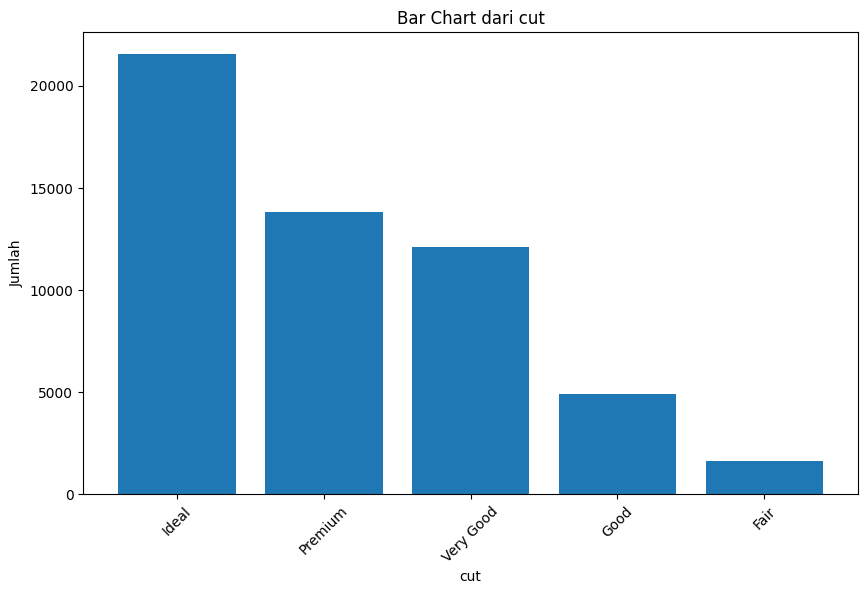

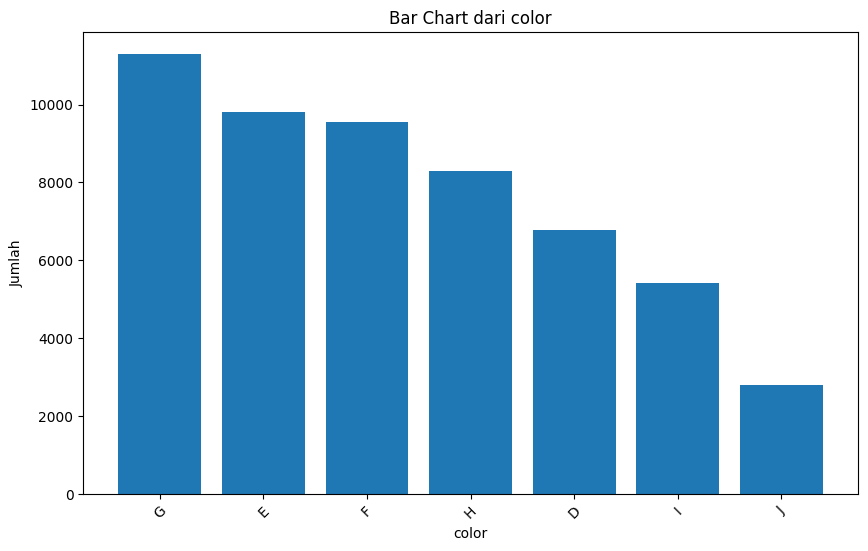

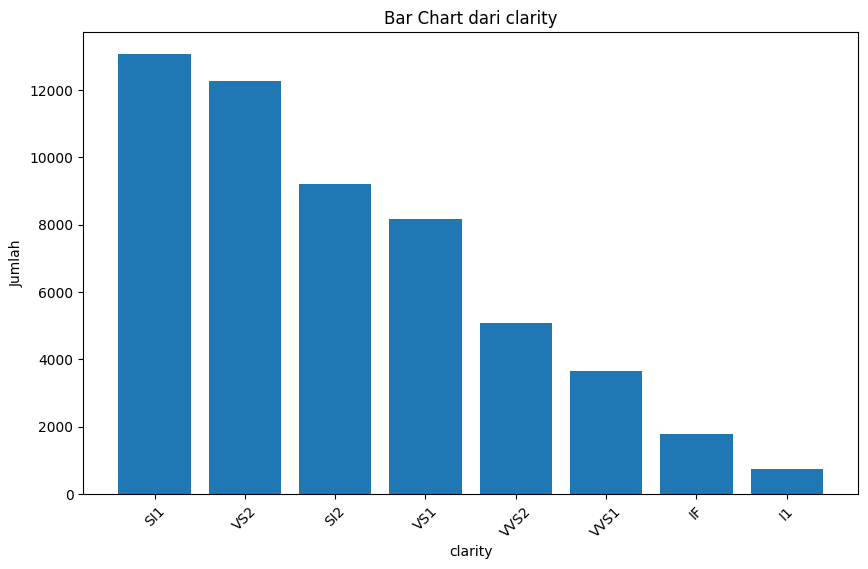

In [ ]:
for column in categorical_df.columns:
    # Hitung frekuensi masing-masing kategori
    category_counts = categorical_df[column].value_counts()

    # Membuat bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(category_counts.index, category_counts.values)
    plt.title(f'Bar Chart dari {column}')
    plt.xlabel(column)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)
    plt.show()

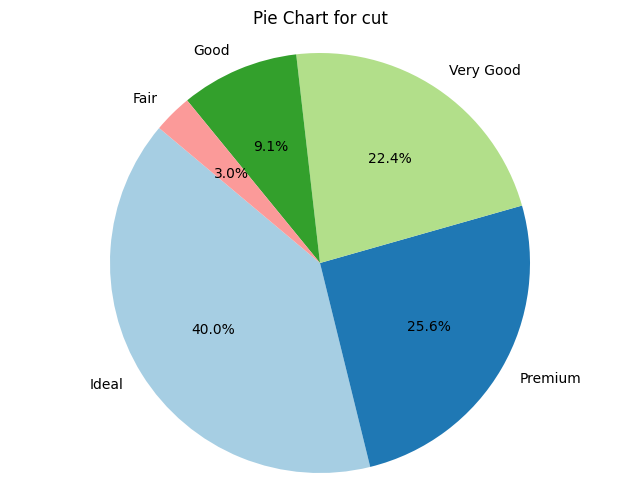

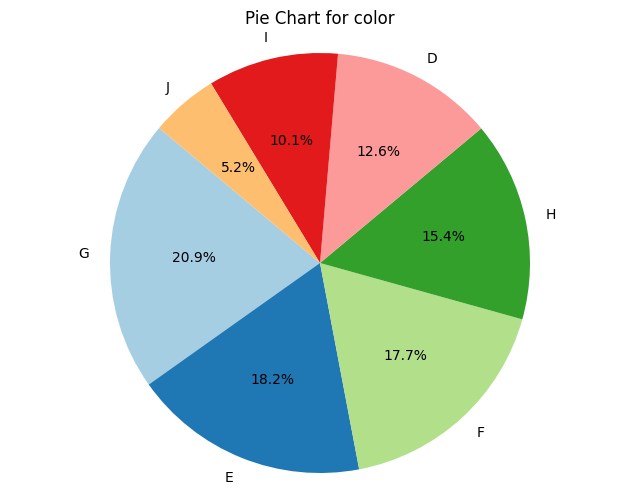

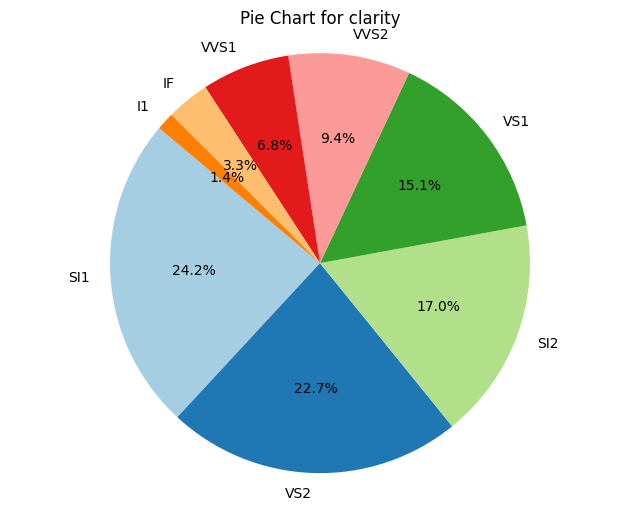

In [ ]:
# Categorical features
categorical_features = ['cut', 'color', 'clarity']

# Membuat pie chart
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    counts = df[feature].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(counts))))
    plt.title(f'Pie Chart for {feature}')
    plt.axis('equal')  # Memastikan bahwa pie chart terlihat sebagai lingkaran.
    plt.show()

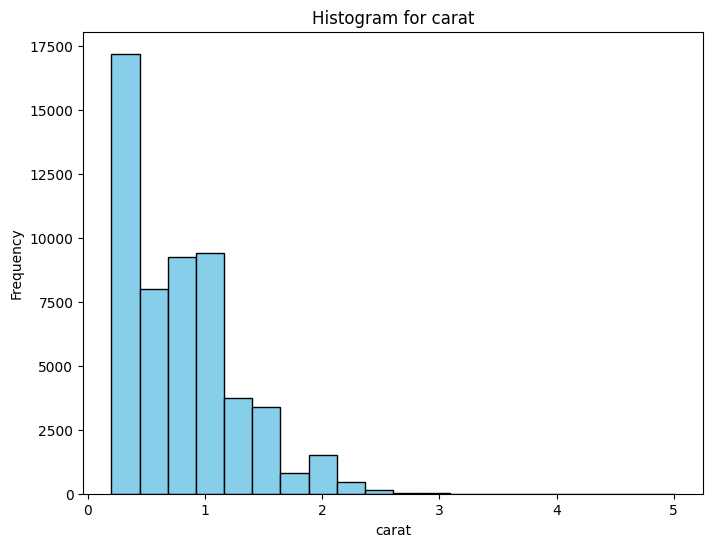

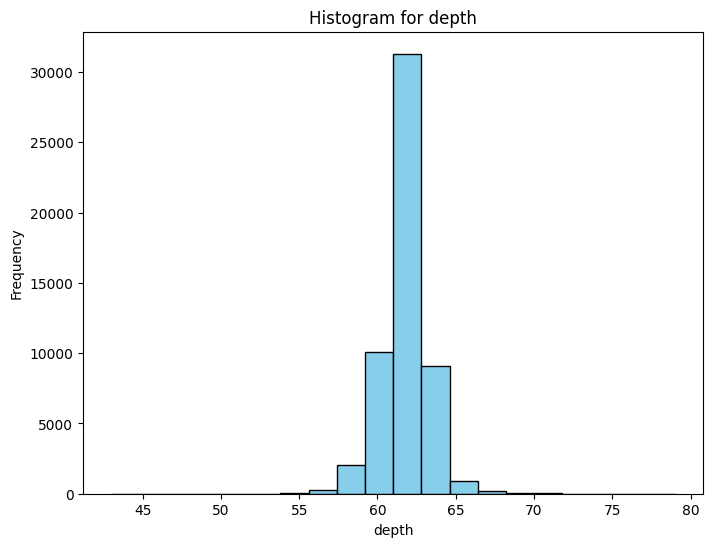

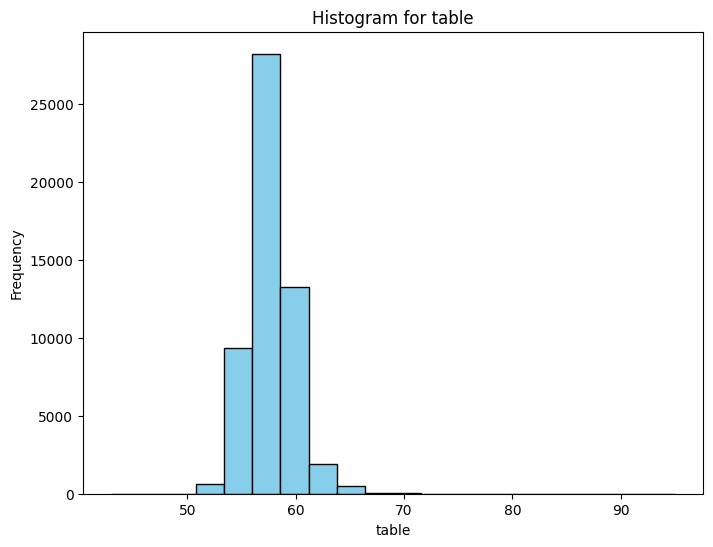

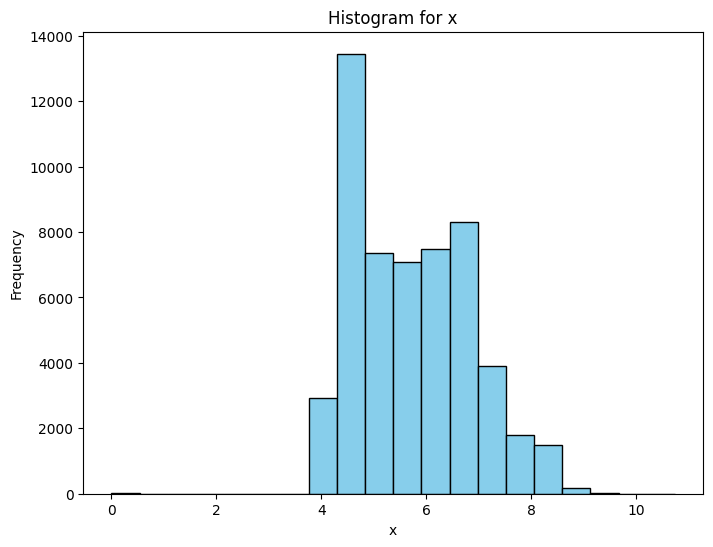

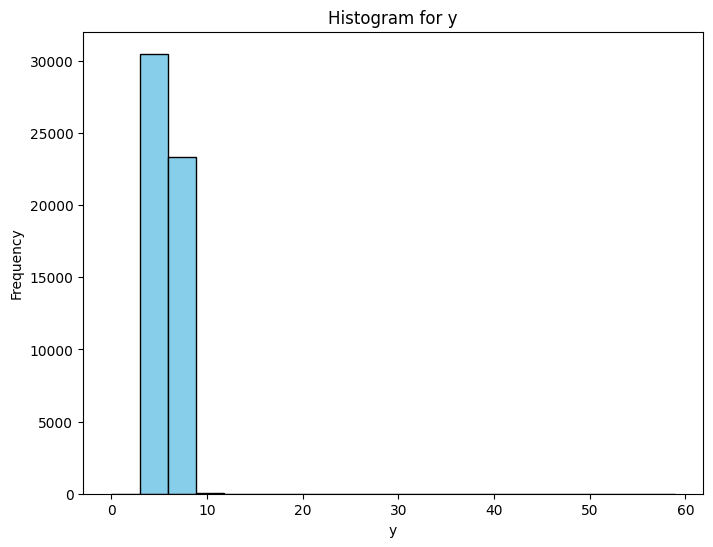

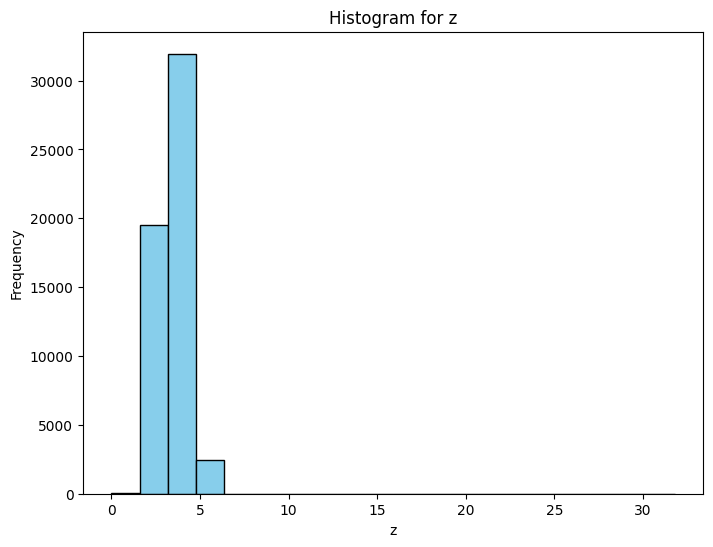

In [ ]:
# Numerical features
numerical_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Membuat histogram untuk setiap numerical feature
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.hist(df[feature], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

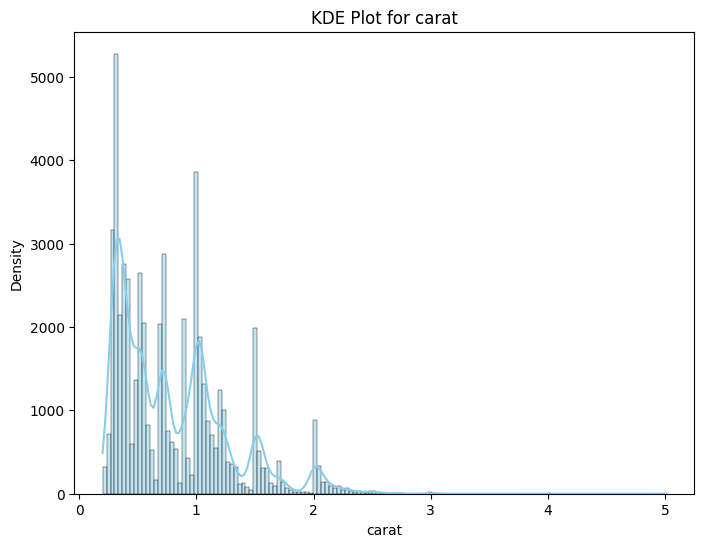

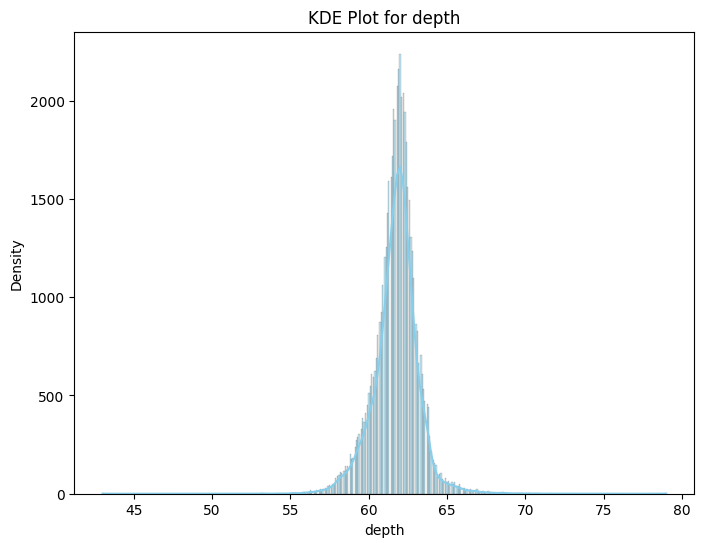

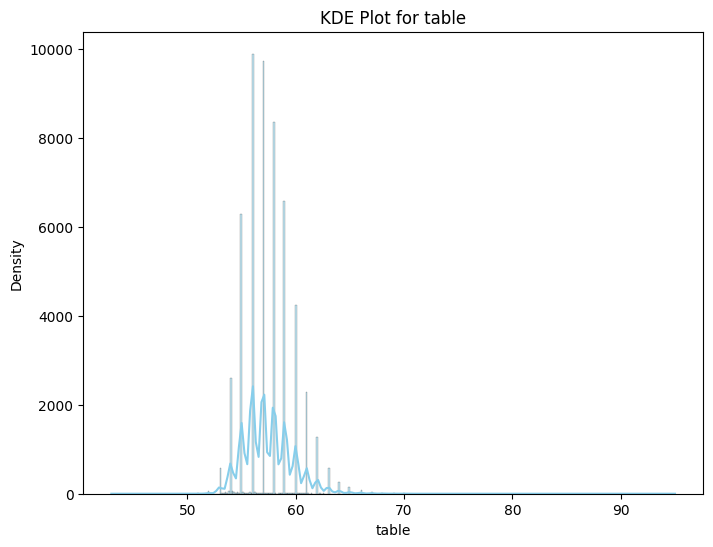

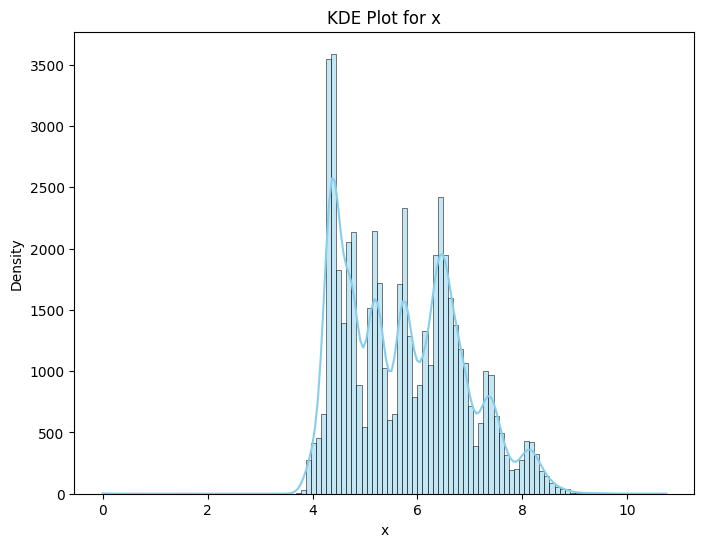

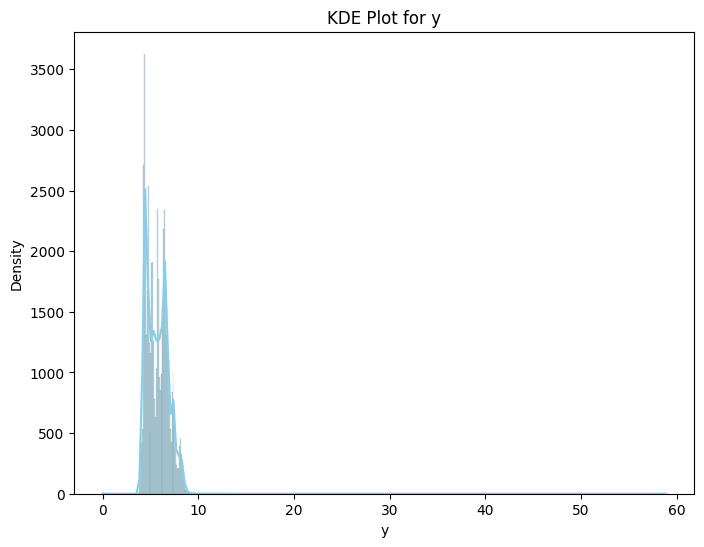

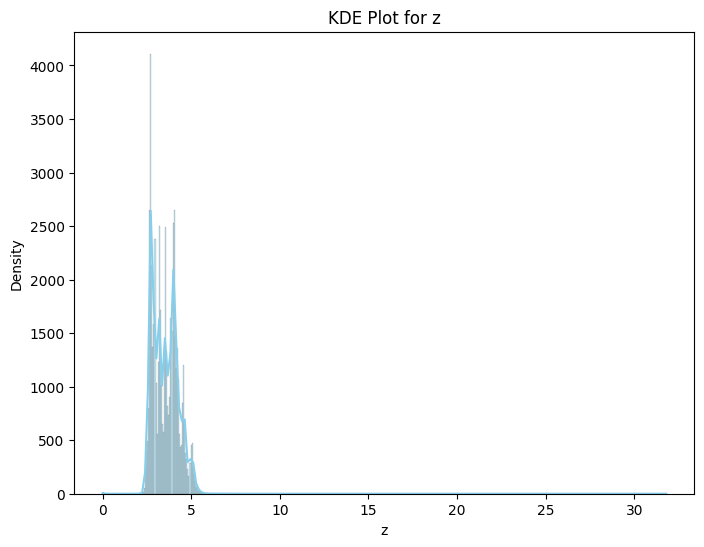

In [ ]:
# Numerical features
numerical_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Membuat plot KDE untuk setiap numerical feature
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True, color='skyblue')
    plt.title(f'KDE Plot for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()

In [ ]:
# Numerical features
numerical_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Fungsi untuk membuat plot interaktif
def plot_histogram(feature, bin_width):
    plt.figure(figsize=(8, 6))
    plt.hist(df[feature], bins=int((df[feature].max() - df[feature].min()) / bin_width), color='skyblue', edgecolor='black')
    plt.title(f'Histogram for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Loop untuk membuat widget interaktif untuk setiap fitur numerik
for feature in numerical_features:
    bin_width_slider = widgets.FloatSlider(min=0.1, max=10, step=0.1, value=1, description=f'Bin Width for {feature}:')
    interact(plot_histogram, feature=widgets.fixed(feature), bin_width=bin_width_slider)

interactive(children=(FloatSlider(value=1.0, description='Bin Width for carat:', max=10.0, min=0.1), Output())…

interactive(children=(FloatSlider(value=1.0, description='Bin Width for depth:', max=10.0, min=0.1), Output())…

interactive(children=(FloatSlider(value=1.0, description='Bin Width for table:', max=10.0, min=0.1), Output())…

interactive(children=(FloatSlider(value=1.0, description='Bin Width for x:', max=10.0, min=0.1), Output()), _d…

interactive(children=(FloatSlider(value=1.0, description='Bin Width for y:', max=10.0, min=0.1), Output()), _d…

interactive(children=(FloatSlider(value=1.0, description='Bin Width for z:', max=10.0, min=0.1), Output()), _d…

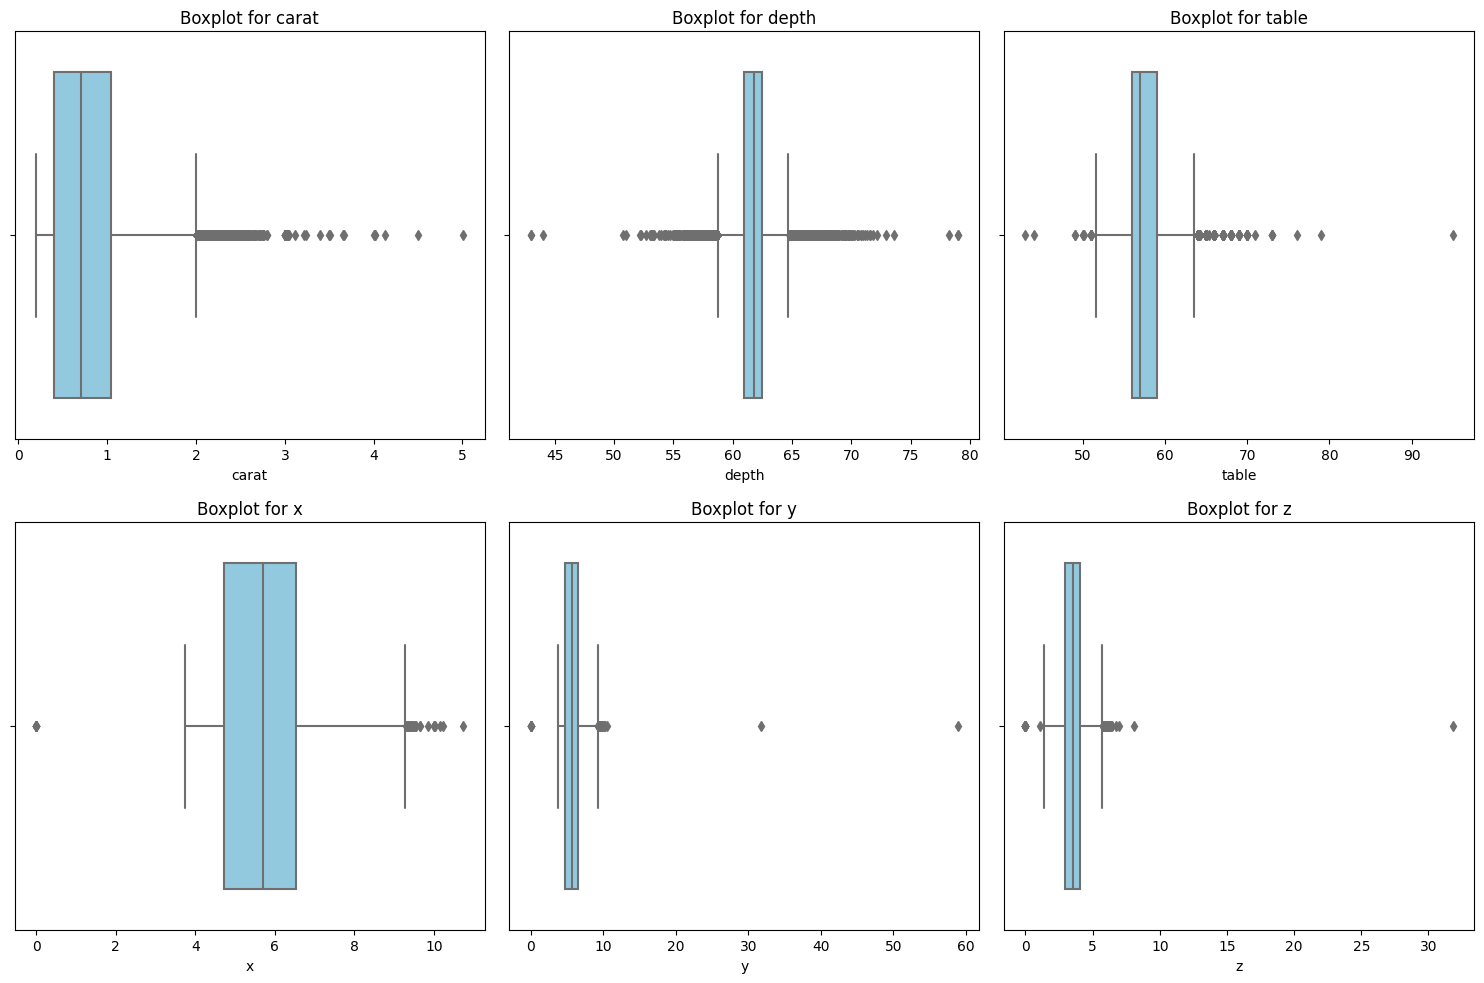

In [ ]:
# Numerical features
numerical_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Membuat subplots 2x3 dengan orientasi horizontal
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Mengatur orientasi boxplot
sns.set(style="whitegrid")
for i, feature in enumerate(numerical_features):
    sns.boxplot(x=df[feature], ax=axes[i//3, i%3], orient='h', color='skyblue')
    axes[i//3, i%3].set_title(f'Boxplot for {feature}')

# Menata layout
plt.tight_layout()
plt.show()